

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Angel Joseph Vargas Martinez


# Introducción
Para la realización de este trabajo se necesito trabajar con 4 temas teóricos:

### Teorema del muestreo
El teorema establece la frecuencia de muestreo, para que una secuencia discreta de muestras capture toda la información de una señal continua en el tiempo, tiene que ser mayor al doble de la frecuencia máxima de la señal.
$$
f_s > 2F_{max}
$$
Si se llega muestrear mas lento, es decir:$$f_s < 2F_{max}$$
Se pierde información
La cantidad de muestreas que necesarias a tomar va a depender de cuánto tiempo se quiera observe la señal
$$
N = T . f_s
$$
En este trabajo se opto por usar una frecuencia($f_s $)igual a 400000 Hz y la cantidad de muestras ($N$) igual a 800

### Ortogonalidad de Señales
Dos señales discretas son ortogonales si su producto interno es nulo:
$$
\sum_{n=0}^{N-1} x[n] \, y[n] = 0
$$

### Autocorrelación
Es la correlación de una señal consigo misma:
$$
r_{xx}[k] = \sum_{n} x[n] \, x[n+k]
$$

### Correlación Cruzada
Es la correlación de dos señales distintas:
$$
r_{xy}[k] = \sum_{n} x[n] \, y[n+k]
$$
# Análisis y desarrollo


En esta parte del código defino las librerías y las funciones que voy a utilizar
Siendo "sen" la función de una senoidal, "modu" la señal modulada, "cuad" la señal y pulso rectangular, y "cos" la señal del coseno


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def sen(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    
    return tt, xx

def modu(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = (dc + vmax * np.sin(w0 * tt + ph))*(dc + vmax * np.sin((w0/2) * tt +ph))
    
    return tt, xx

from scipy import signal
def cuad(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000, duty=0.5):
    tt = np.arange(0,nn)/fs
    xx = dc + (vmax *signal.square(2 * np.pi * ff * tt + ph, duty=duty))

    
    return tt, xx

def cos(vmax, dc, ff, ph, nn, fs):
    
    n = np.arange(0,nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.cos(w0*tt+ph)
    
    return tt, xx

En esta parte del codigo se resuelve lo que pide la consigna:

**Sintetizar y graficar**

Una señal sinusoidal de 2KHz.

Misma señal amplificada y desfazada en π/2.

Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

Señal anterior recortada al 75% de su amplitud.

Una señal cuadrada de 4KHz.

Un pulso rectangular de 10ms.

Se utilizo $Fs= 40000$ y $N=800$


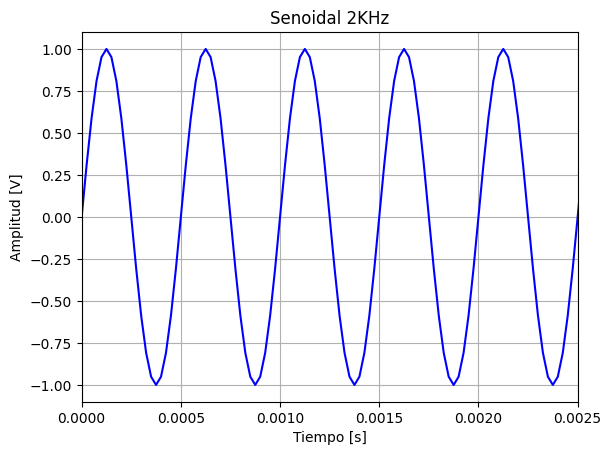

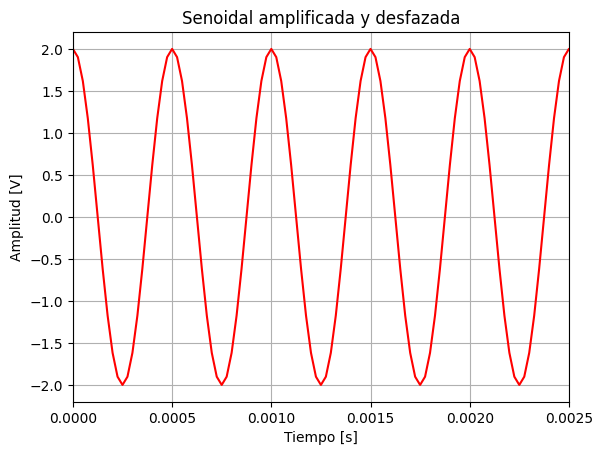

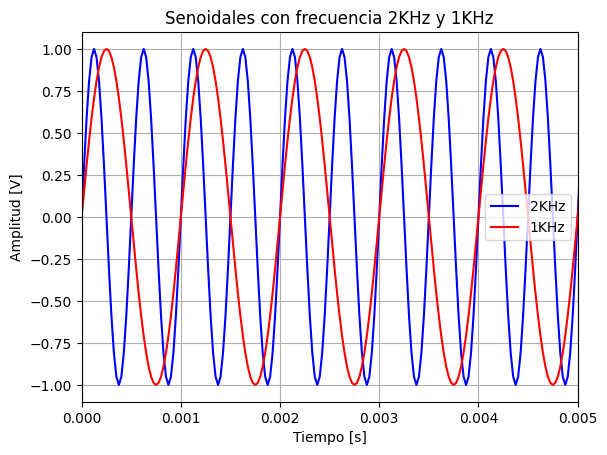

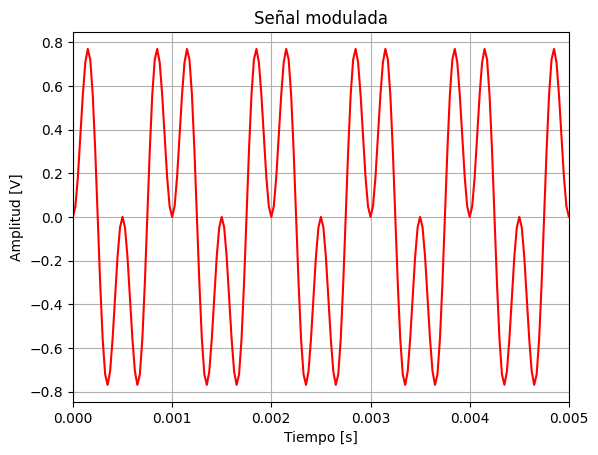

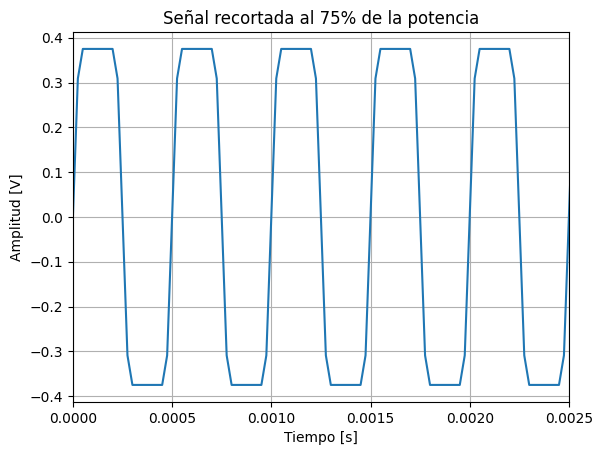

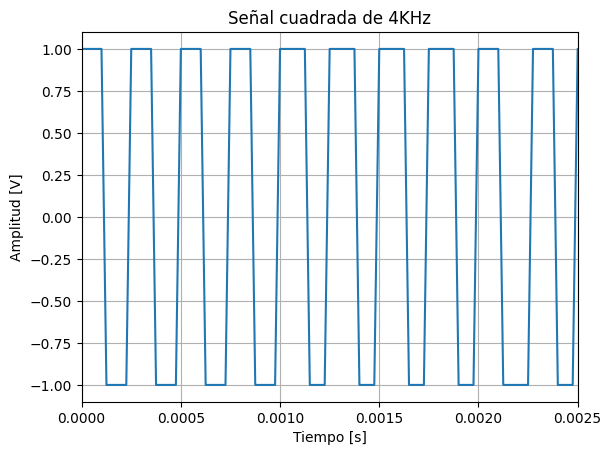

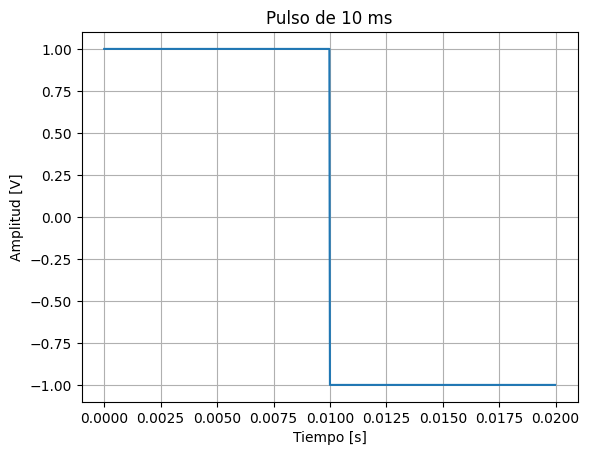

In [4]:
N =800
fs1 = 40000
vmax1=1
dc1=0
f1=2000
ph1=0
t1,x1 = sen(vmax=vmax1,dc=dc1,ff=f1,ph=ph1,nn=N,fs=fs1)

vmax2=2
dc2=0
f2=f1
ph2= np.pi / 2
t2,x2 = sen(vmax=vmax2,dc=dc2,ff=f2,ph=ph2,nn=N,fs=fs1)

# Senoidal 2KHz
plt.figure()
plt.plot(t1, x1, color='blue')
plt.title('Senoidal 2KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

# Senoidal amplificada y desfazada
plt.figure()
plt.plot(t2, x2, color='red')
plt.title('Senoidal amplificada y desfazada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

ta,xa = sen(vmax=vmax1,dc=dc1,ff=f1/2,ph=ph1,nn=N,fs=fs1)
t3,x3 = modu(vmax=vmax1,dc=dc1,ff=f1,ph=ph1,nn=N,fs=fs1)

# Senoidales con frecuencia 2KHz y 1KHz
plt.figure()
plt.plot(t1, x1, color='blue', label='2KHz')
plt.plot(ta, xa, color='red', label='1KHz')
plt.title('Senoidales con frecuencia 2KHz y 1KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.005)
plt.legend()
plt.grid(True)

# Señal modulada
plt.figure()
plt.plot(t3, x3, color='red')
plt.title('Señal modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.005)
plt.grid(True)

plt.show()

threshold= 0.75 * (vmax1**2)/2
x4 = np.clip(x1,-threshold,threshold)
plt.figure(6)
plt.plot(t1,x4)
plt.title('Señal recortada al 75% de la potencia')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,0.0025)
plt.grid(True)
plt.show()

t5,x5 = cuad(vmax=vmax1,dc=dc1,ff=4000,ph=ph1,nn=N,fs=fs1,duty=0.5)
plt.figure(7)
plt.plot(t5,x5)
plt.title('Señal cuadrada de 4KHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,0.0025)
plt.grid(True)
plt.show()


t6,x6=cuad(vmax=vmax1,dc=dc1,ff=50,ph=ph1,nn=N,fs=fs1,duty=0.5)
plt.plot(t6,x6)
plt.title('Pulso de 10 ms')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()

En esta parte se verifica la ortogonalidad entre la primera señal y las demás

In [4]:
a1=0.0
a2=0.0
a3=0.0
a4=0.0
a5=0.0
for d in range(N-1):
        a1 += x1[d]*x2[d]
        a2 += x1[d]*x3[d]
        a3 += x1[d]*x4[d]
        a4 += x1[d]*x5[d]
        a5 += x1[d]*x6[d]
    
if a1==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal amplificada y desfazada en π/2.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal amplificada y desfazada en π/2.')
if a2==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.')

if a3==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal recortada al 75% de su amplitu.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal recortada al 75% de su amplitu.')
if a4==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con la señal cuadrada de 4KHz.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con la señal cuadrada de 4KHz.')
if a5==0:
    print ('La señal sinusoidal de 2KHz es ortogonal con el pulso rectangular de 10ms.')
else:
    print ('La señal sinusoidal de 2KHz no es ortogonal con el pulso rectangular de 10ms.')

La señal sinusoidal de 2KHz no es ortogonal con la señal amplificada y desfazada en π/2.
La señal sinusoidal de 2KHz no es ortogonal con la señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
La señal sinusoidal de 2KHz no es ortogonal con la señal recortada al 75% de su amplitu.
La señal sinusoidal de 2KHz no es ortogonal con la señal cuadrada de 4KHz.
La señal sinusoidal de 2KHz no es ortogonal con el pulso rectangular de 10ms.


En esta otra parte se grafica la autocorrelación de la primera señal y la correlación entre ésta y las demás

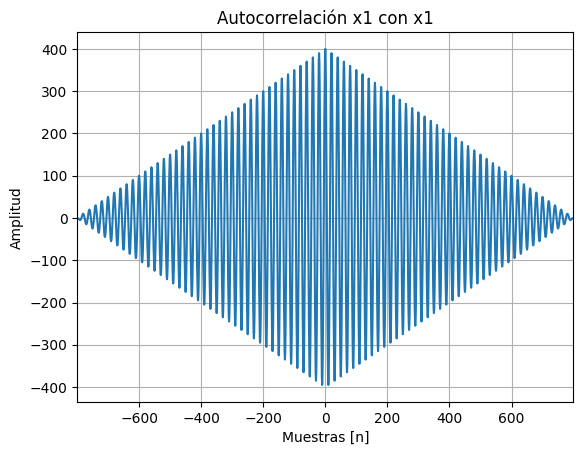

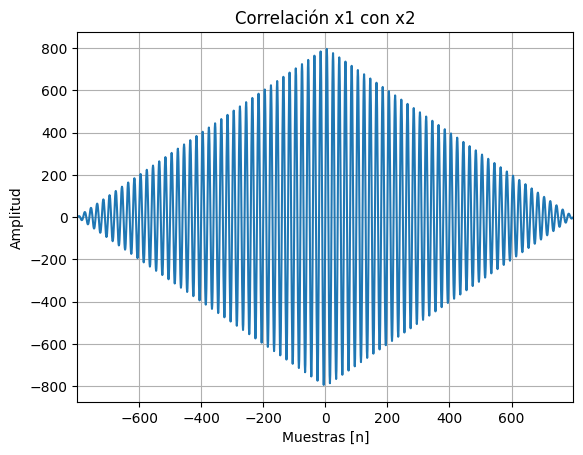

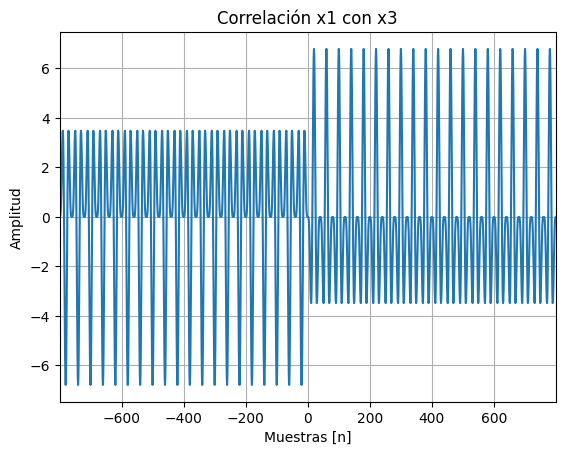

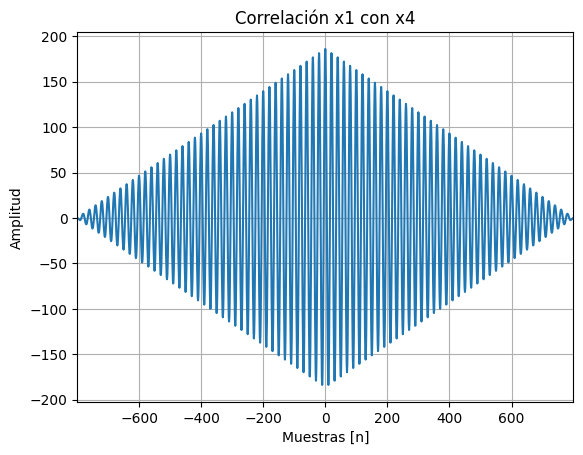

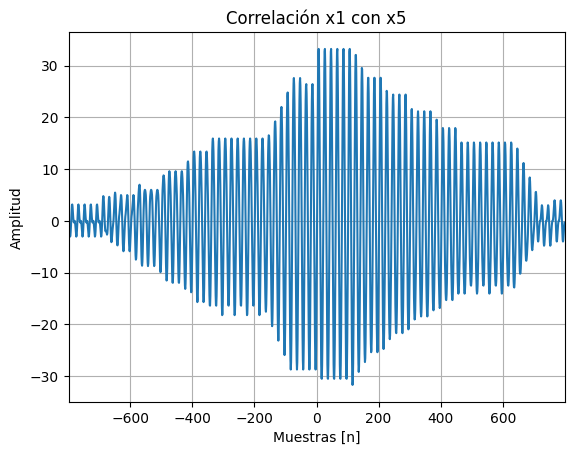

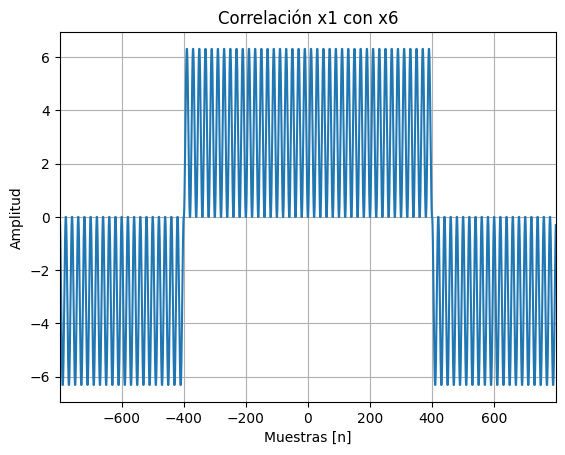

In [6]:
rx1=sig.correlate(x1,x1) #Autocorrelacion
rx2= sig.correlate(x1,x2)
rx3= sig.correlate(x1,x3)
rx4= sig.correlate(x1,x4)
rx5= sig.correlate(x1,x5)
rx6= sig.correlate(x1,x6)

lags = np.arange(-N+1, N)  # N=800
center = N-1  # para correlación de longitud 2N-1

# Listas de correlaciones y títulos
correlations = [rx1, rx2, rx3, rx4, rx5, rx6]
titles = [
    "Autocorrelación x1 con x1",
    "Correlación x1 con x2",
    "Correlación x1 con x3",
    "Correlación x1 con x4",
    "Correlación x1 con x5",
    "Correlación x1 con x6"
]

# Graficar cada correlación en figura separada
for i, rx in enumerate(correlations, start=8):
    plt.figure(i)
    plt.plot(lags, rx)
    plt.title(titles[i-8])
    plt.xlabel("Muestras [n]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.xlim(-N+1, N-1)  # eje centrado en cero
plt.show()


Aca se resuelve la siguiente identidad trigonometrica
$$ 2 \cdot \sin(\alpha) \cdot \sin(\beta) \;=\; \cos(\alpha - \beta) - \cos(\alpha + \beta) $$


![Mi imagen](tps1.jpeg)



Por último se grafican ambas señales trigonométricas para demostrar que son iguales

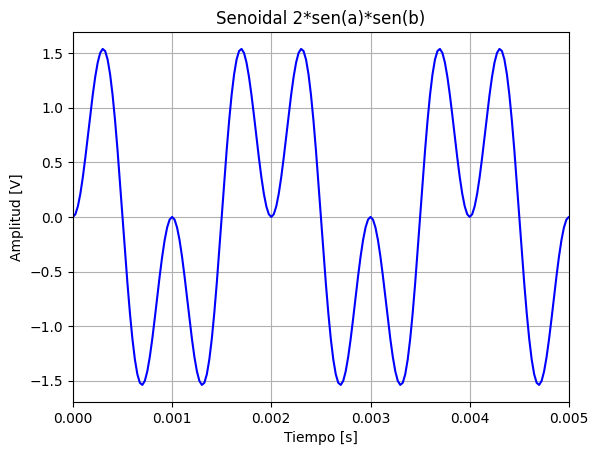

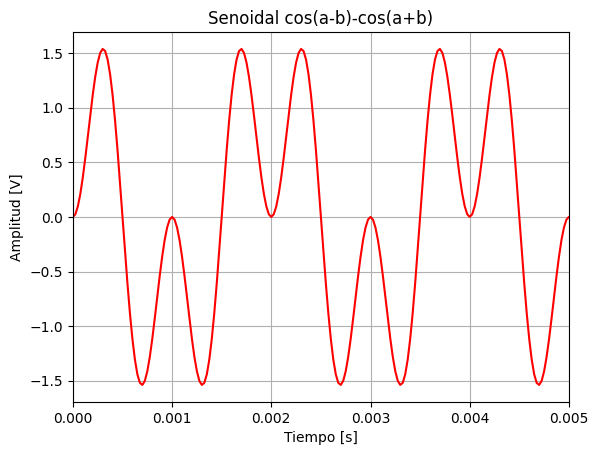

In [7]:
tt1,y1= sen(vmax= vmax1, dc = dc1, ff=1000, ph=0, nn=N, fs=fs1)
tt2,y2=sen(vmax= vmax1, dc = dc1, ff=500, ph=0, nn=N, fs=fs1)
y= 2*y1*y2
#a-b= 500Hz
#a+b= 1500Hz
tt3,y3=cos(vmax=vmax1,dc=dc1, ff=500, ph=0, nn=N, fs=fs1)
tt4,y4=cos(vmax=vmax1,dc=dc1, ff=1500, ph=0, nn=N, fs=fs1)
b=y3-y4
# Primer gráfico
plt.figure()
plt.plot(tt1, y, color='blue')
plt.title('Senoidal 2*sen(a)*sen(b)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.005)
plt.grid(True)

# Segundo gráfico
plt.figure()
plt.plot(tt3, b, color='red')
plt.title('Senoidal cos(a-b)-cos(a+b)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.005)
plt.grid(True)

plt.show()


# Conclusiones 
Al realizar este trabajo se logró generar señales parametrizadas en amplitud, valor medio, frecuencia, fase, número de muestras y frecuencia de muestreo, con lo cual reforzó la importancia del teorema muestreo y de la relación entre la frecuencia de la señal y la frecuencia de muestreo, y por último se introdujeron conceptos de correlación y autocorrelación.

La correlación mide coincidencia entre señales, por esta razón cuando se calcula la autocorrelación el punto donde hay mayor energía es $Rxx[0]$, pero mientras avanzamos en la autocorrelación, esta tiende a 0 en los extremos porque las señales casi no se superponen
Si no centramos la correlación, el eje simplemente va de 0 a 2N-1 (longitud del vector), y sería más difícil relacionar cada muestra con su desplazamiento real en tiempo. Se tiene que hacer esto porque la función "correlate" lo hace desde $-∞$ hasta $+∞$

Por último cabe destacar que la ortogonalidad si está presente en algunas señales pero nunca se "comprueba" con la sumatoria igual a 0, ya que al realizarla nos da un número muy chico cercano a 0, debido a que utilizamos partes de las señales en lo cual se pierde información.


# Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

**Resolví la tarea, pero tengo dudas**

Resolví la tarea,pero no entendí bien

No pude resolverla y no entendí

Responder:

¿Qué aprendiste al hacer esta tarea?

Aprendi hacer las funciones que pedian que realice y como hacer las autocorrelacion, ortogonalidad y la correlacion cruzada

¿Qué te quedó claro? ¿Qué te sigue costando?

Las funciones, pero la del pulso no se si esta bien hecha y los graficos de la autocorrelacion y correlacion cruzada no se si estan bien. Algo que no entendi bien es cual es el uso de la autocorrelacion y correlacion cruzada
Indicar si se utilizó IA:

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.** 

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones.
